<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/trying_of_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydantic-settings

In [ ]:
!pip install pandas-profiling[notebook,html]
!pip install pydantic-settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b175064fa5a80c1f110605ff2d116df876ec3701ff883665f0a4ea2db4a3dd1e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
data = pd.read_csv('/content/df9_data.csv')
df = pd.DataFrame(data)
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,Active,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,Laborers,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
2,C-26480,Zoe Chitty,F,65,2222.435,High,Pensioner,Laborers,Rural,80057.92,...,832.70,1,Unpossessed,890,2223.25,2,Semi-Urban,1,121441.51,56040.54
3,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
4,C-17688,Polly Crumpler,F,60,1234.920,Low,State servant,Secretaries,Rural,34434.72,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22969,C-7813,Jocelyn Deschamp,M,39,2250.190,Low,Commercial associate,Managers,Rural,83810.38,...,739.82,0,Inactive,265,2250.19,3,Urban,1,129028.33,62857.78
22970,C-32511,Silas Slaugh,M,20,1606.880,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
22971,C-5192,Carmelo Lone,F,49,2222.435,Low,Working,Sales staff,Urban,81410.08,...,739.82,0,Active,959,2223.25,1,Rural,1,102108.02,61057.56
22972,C-12172,Carolann Osby,M,38,2417.710,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [ ]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

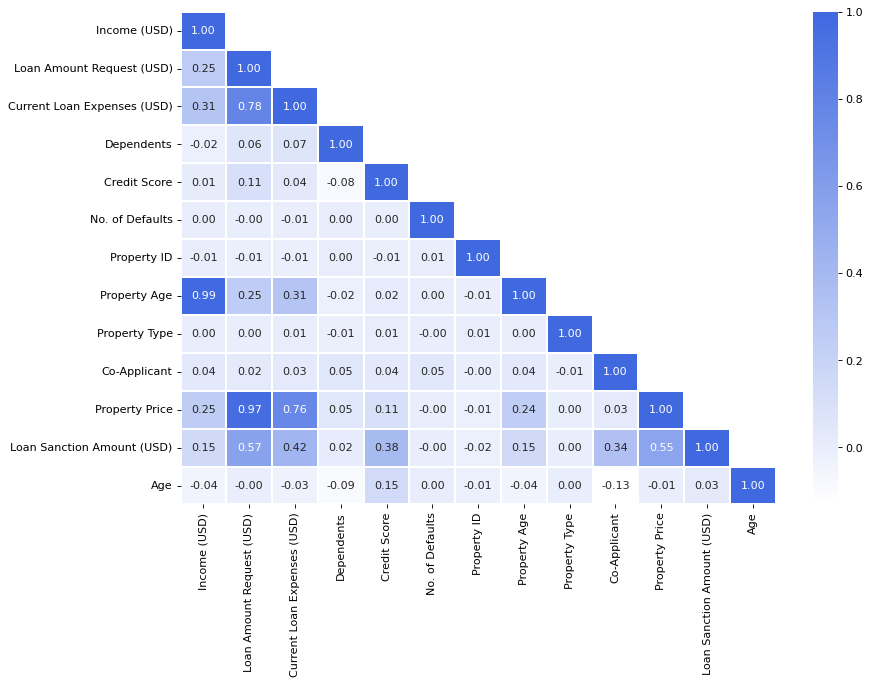

In [ ]:
# Calculation of the Spearman correlation
target = 'Age'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)

# Select only numerical columns for correlation calculation
numerical_df = df_ordered.select_dtypes(include=['number'])
corr = numerical_df.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

In [ ]:
df[df['Loan Sanction Amount (USD)']<0]['Loan Sanction Amount (USD)'].count()#negative values

0

In [ ]:
df[df['Loan Sanction Amount (USD)']<0]['Loan Sanction Amount (USD)'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].apply(abs)

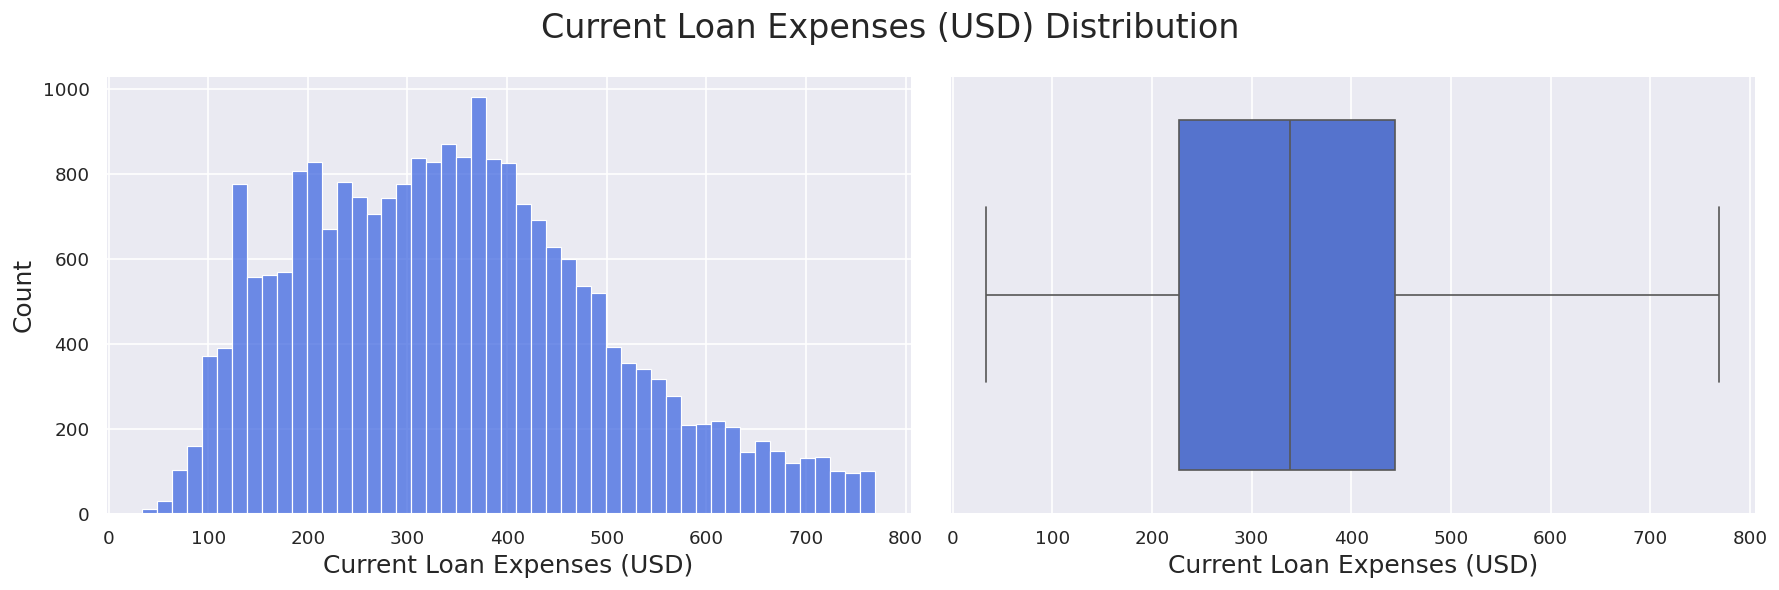

In [ ]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Current Loan Expenses (USD)', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Current Loan Expenses (USD)', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Current Loan Expenses (USD) Distribution', fontsize=20)
plt.tight_layout()
plt.show()

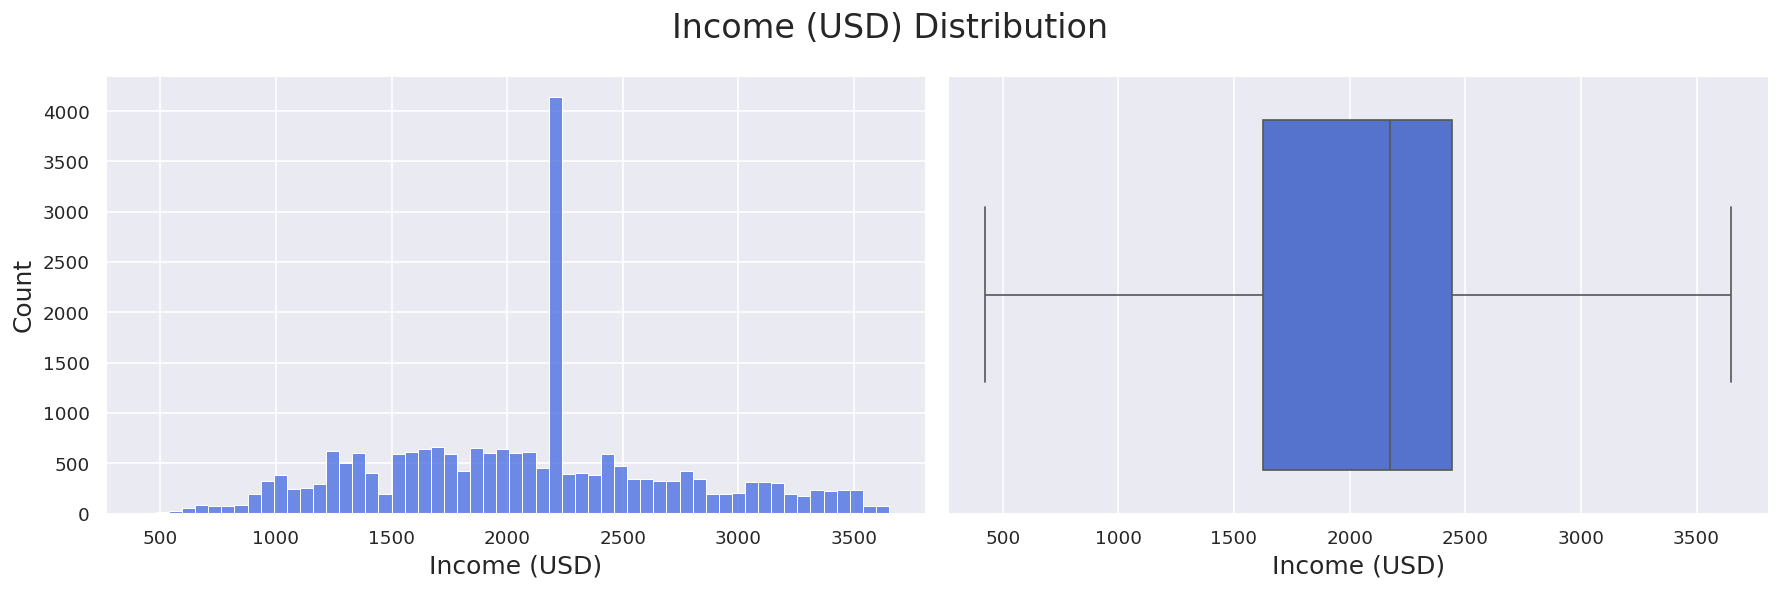

In [ ]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Income (USD)', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Income (USD)', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Income (USD) Distribution', fontsize=20)
plt.tight_layout()
plt.show()